In [3]:


import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [5]:
#data_day= pd.read_csv("/Users/ghaidaa/Desktop/Bike_sharing/day.csv")
data=pd.read_csv("/Users/ghaidaa/Desktop/Bike-sharing/hour.csv")

In [353]:
data.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [354]:
data.tail()


,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [315]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## data

In [316]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [317]:
data.duplicated().sum()

0

In [318]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
data.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [320]:
data.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [7]:
# date time conversion
data['datetime'] = pd.to_datetime(data.datetime)

# categorical variables
data['season'] = data.season.astype('category')
data['is_holiday'] = data.is_holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['weather'] = data.weather.astype('category')
data['is_workingday'] = data.is_workingday.astype('category')
data['month'] = data.month.astype('category')
data['year'] = data.year.astype('category')
data['hour'] = data.hour.astype('category')

In [322]:
data.sample(5)

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
8966,8967,2012-01-14,1,1,1,11,0,6,0,1,0.20,0.1970,0.40,0.1940,28,150,178
12867,12868,2012-06-25,3,1,6,8,0,1,1,1,0.66,0.6212,0.69,0.1940,53,555,608
16794,16795,2012-12-07,4,1,12,13,0,5,1,2,0.36,0.3485,0.66,0.1343,23,197,220
15786,15787,2012-10-24,4,1,10,23,0,3,1,2,0.58,0.5455,0.68,0.0896,12,111,123
13714,13715,2012-07-30,3,1,7,15,0,1,1,1,0.80,0.7424,0.49,0.2537,51,185,236


In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rec_id         17379 non-null  int64         
 1   datetime       17379 non-null  datetime64[ns]
 2   season         17379 non-null  category      
 3   year           17379 non-null  category      
 4   month          17379 non-null  category      
 5   hour           17379 non-null  category      
 6   is_holiday     17379 non-null  category      
 7   weekday        17379 non-null  category      
 8   is_workingday  17379 non-null  category      
 9   weather        17379 non-null  category      
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  humidity       17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

In [324]:
data.describe(include='all').T

<ipython-input-324-2e3a9b6d192b>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
rec_id,17379.0,NaN,NaN,NaN,NaT,NaT,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
datetime,17379,731,2011-02-07 00:00:00,24,2011-01-01,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,4.0,3.0,4496.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,17379.0,2.0,1.0,8734.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,17379.0,12.0,5.0,1488.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,17379.0,24.0,17.0,730.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_holiday,17379.0,2.0,0.0,16879.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,17379.0,7.0,6.0,2512.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_workingday,17379.0,2.0,1.0,11865.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,17379.0,4.0,1.0,11413.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rec_id         17379 non-null  int64         
 1   datetime       17379 non-null  datetime64[ns]
 2   season         17379 non-null  category      
 3   year           17379 non-null  category      
 4   month          17379 non-null  category      
 5   hour           17379 non-null  category      
 6   is_holiday     17379 non-null  category      
 7   weekday        17379 non-null  category      
 8   is_workingday  17379 non-null  category      
 9   weather        17379 non-null  category      
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  humidity       17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

In [326]:
data.describe(include='all').T

<ipython-input-326-2e3a9b6d192b>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
rec_id,17379.0,NaN,NaN,NaN,NaT,NaT,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
datetime,17379,731,2011-02-07 00:00:00,24,2011-01-01,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,4.0,3.0,4496.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,17379.0,2.0,1.0,8734.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,17379.0,12.0,5.0,1488.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,17379.0,24.0,17.0,730.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_holiday,17379.0,2.0,0.0,16879.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,17379.0,7.0,6.0,2512.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_workingday,17379.0,2.0,1.0,11865.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,17379.0,4.0,1.0,11413.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
data.datetime.unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000', '2011-01-04T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-01-06T00:00:00.000000000',
       '2011-01-07T00:00:00.000000000', '2011-01-08T00:00:00.000000000',
       '2011-01-09T00:00:00.000000000', '2011-01-10T00:00:00.000000000',
       '2011-01-11T00:00:00.000000000', '2011-01-12T00:00:00.000000000',
       '2011-01-13T00:00:00.000000000', '2011-01-14T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-16T00:00:00.000000000',
       '2011-01-17T00:00:00.000000000', '2011-01-18T00:00:00.000000000',
       '2011-01-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-01-21T00:00:00.000000000', '2011-01-22T00:00:00.000000000',
       '2011-01-23T00:00:00.000000000', '2011-01-24T00:00:00.000000000',
       '2011-01-25T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-01-27T00:00:00.000000000', '2011-01-28

In [328]:
data.season.unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [329]:
data.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [330]:
data.year.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [331]:
data.year.value_counts()

1    8734
0    8645
Name: year, dtype: int64

In [332]:
data.weekday.unique()

[6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5]

In [333]:
data.weekday.value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [334]:
data.is_holiday.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [335]:
data.is_holiday.value_counts()

0    16879
1      500
Name: is_holiday, dtype: int64

In [336]:
data.weekday.unique()

[6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5]

In [337]:
data.month.unique()

[1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [10]:
df_train, df_test =train_test_split(data , test_size = 0.2 , random_state=0)

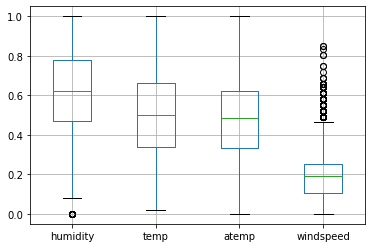

In [12]:
boxplot = df_train.boxplot(column=['humidity', 'temp', 'atemp','windspeed'])

/Users/ghaidaa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


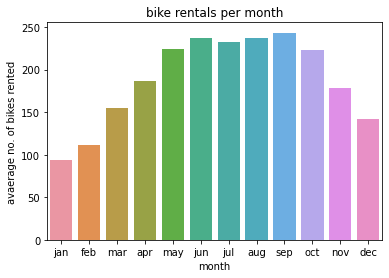

In [15]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
ax = sns.barplot('month', 'total_count', data=df_train, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)

plt.title('bike rentals per month')

plt.show()

/Users/ghaidaa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



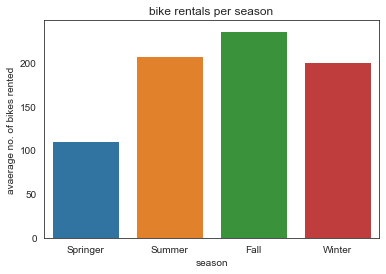

In [344]:
season = 'Springer,Summer,Fall,Winter'.split(',')
ax = sns.barplot('season', 'total_count', data=df_train, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('season')
ax.set_xticklabels(season)

plt.title('bike rentals per season')

plt.show()

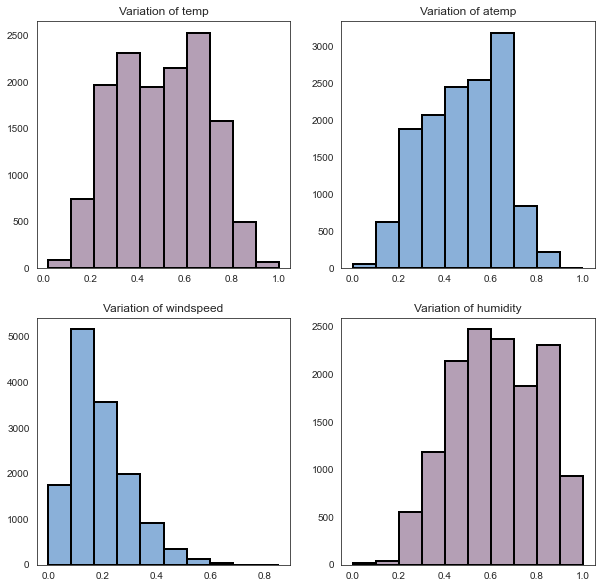

In [345]:
df_train.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df_train,edgecolor="black",linewidth=2,color='#b49fb5')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df_train,edgecolor="black",linewidth=2,color='#8ab0d9')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df_train,edgecolor="black",linewidth=2,color='#8ab0d9')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df_train,edgecolor="black",linewidth=2,color='#b49fb5')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

<ipython-input-346-0e31511028b1>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



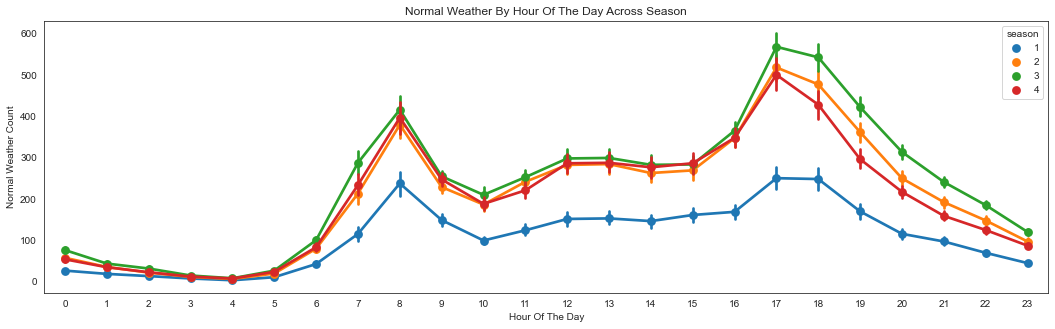

In [346]:
fig, ax = plt.subplots(figsize=(18, 5))
seasons = ['spring', 'summer', 'fall', 'winter']
ax.set_xticklabels(seasons)
sns.pointplot(x=df_train["hour"], y=df_train["total_count"], hue=df_train["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

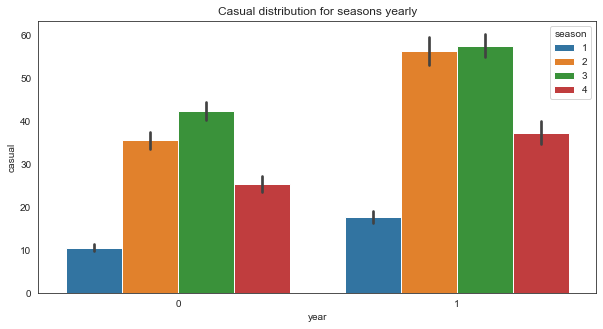

In [351]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='year',y='casual',data=df_train,hue='season',ax=ax)
ax.set_title('Casual distribution for seasons yearly')
plt.show()

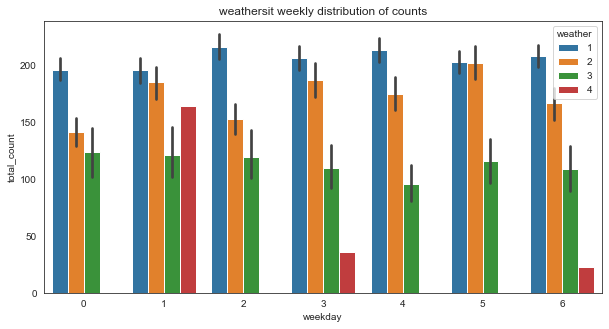

In [350]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='weekday',y='total_count',data=df_train,hue='weather',ax=ax)
ax.set_title('weathersit weekly distribution of counts')
plt.show()

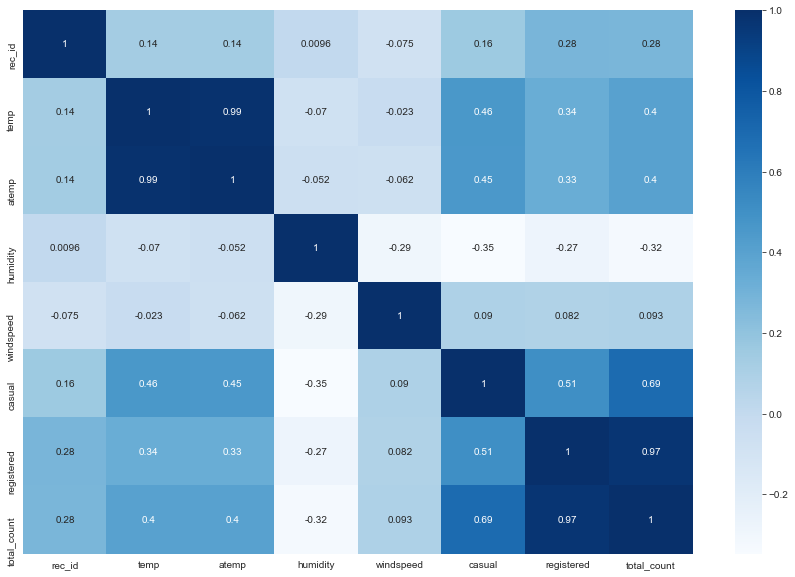

In [352]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues');

#drop column have high correlation between them


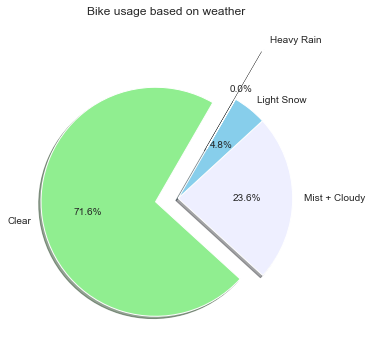

In [356]:
plt.figure(figsize=(5, 6))

labels = 'Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'
sizes = df_train.total_count.groupby(df_train.weather).sum().tolist()
colors = ['lightgreen', '#eeefff', 'skyblue', 'black']
explode = (0.2, 0, 0, 0.5)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()

<AxesSubplot:xlabel='hour', ylabel='total_count'>

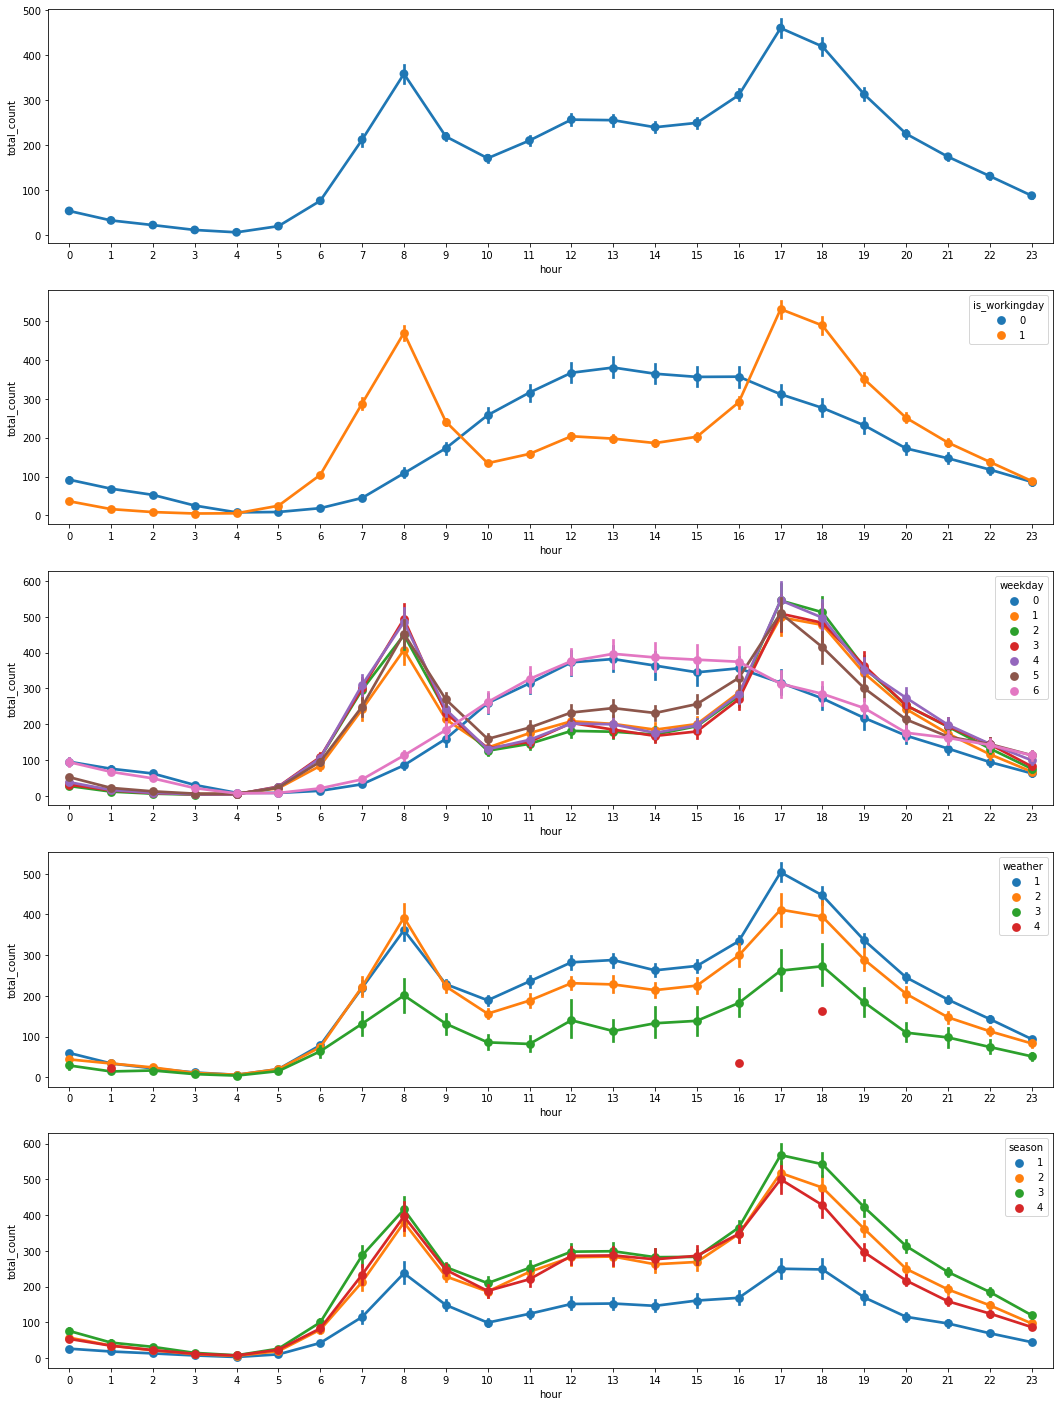

In [17]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=df_train, x="hour", y="total_count", ax=ax1)

sns.pointplot(data=df_train, x="hour", y="total_count", hue="is_workingday", ax=ax2)

sns.pointplot(data=df_train, x="hour", y="total_count", hue="weekday", ax=ax3)

sns.pointplot(data=df_train, x="hour", y="total_count", hue="weather", ax=ax4)

sns.pointplot(data=df_train, x="hour", y="total_count", hue="season", ax=ax5)

In [295]:
data1 = pd.concat([data, pd.get_dummies(data['season'], prefix='season')],axis=1)

In [253]:
data1 = data.drop(["season"],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(season[[ ']], udemy[['rating']], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Data has",X_train.shape)
print("Validation Data has",X_val.shape)
print("Training Data has",X_test.shape)